# Importing necessery datasets

In [1]:
pip install --upgrade xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd==1.2.0


  Using cached xlrd-1.2.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
import os

def find_file(filename, search_path):
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            return os.path.join(root, filename)

# Replace 'default-of-credit-card-clients.csv' with your file name
file_name = 'default-of-credit-card-clients.csv'

# Search from the root of your system
result = find_file(file_name, '/')
print("File found at:", result)


File found at: /System/Volumes/Data/Users/aindreeaarya/default-of-credit-card-clients.csv


In [11]:
import pandas as pd

file_path = '/System/Volumes/Data/Users/aindreeaarya/default-of-credit-card-clients.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path, header=1)  # Skip the first row (which contains an extra column header)
print(df.head())  # Display the first few rows of the DataFrame

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
0   1      20000    2          2         1   24      2      2     -1     -1  \
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
0  ...          0          0          0         0       689         0  \
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Checking null values

In [17]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [19]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

# Exploration

## Distribution of Target Variable

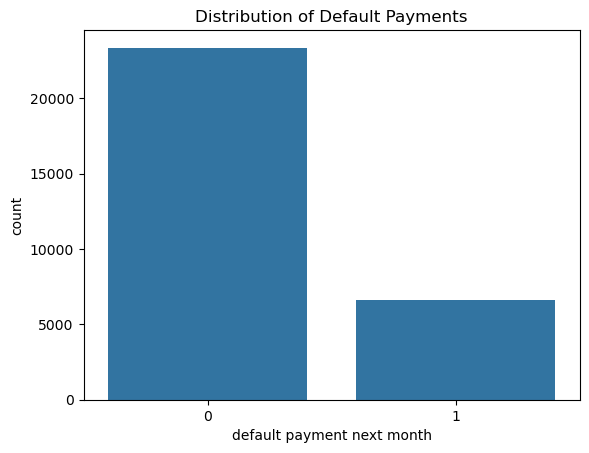

In [21]:
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payments')
plt.show()

## Distribution of LIMIT_BAL

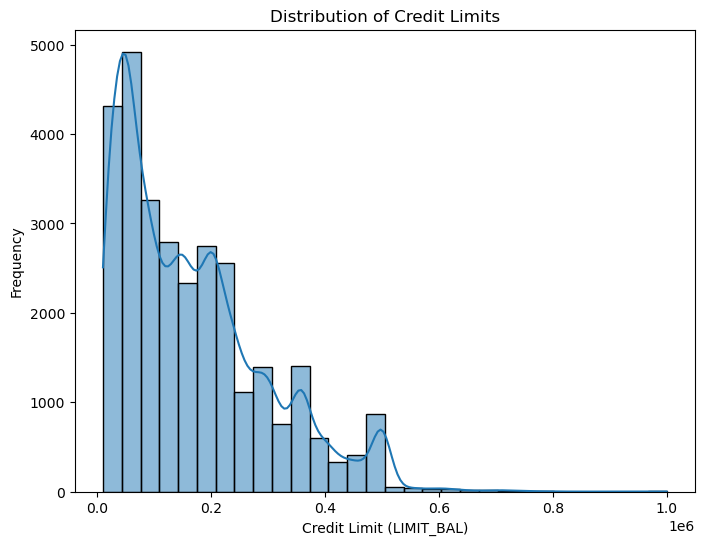

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True)
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Frequency')
plt.show()


## Gender Distribution (SEX)

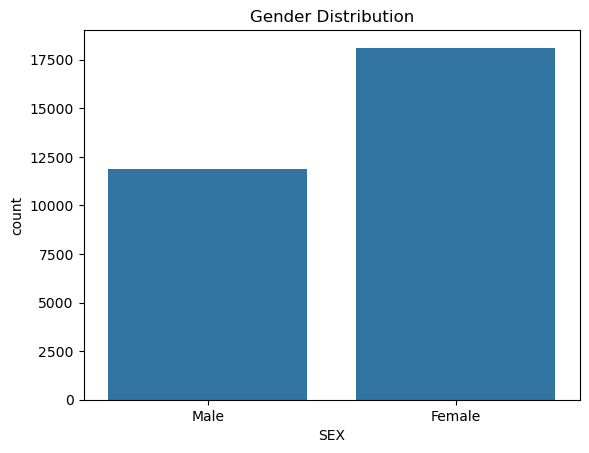

In [25]:
sns.countplot(x='SEX', data=df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


## Distribution of AGE

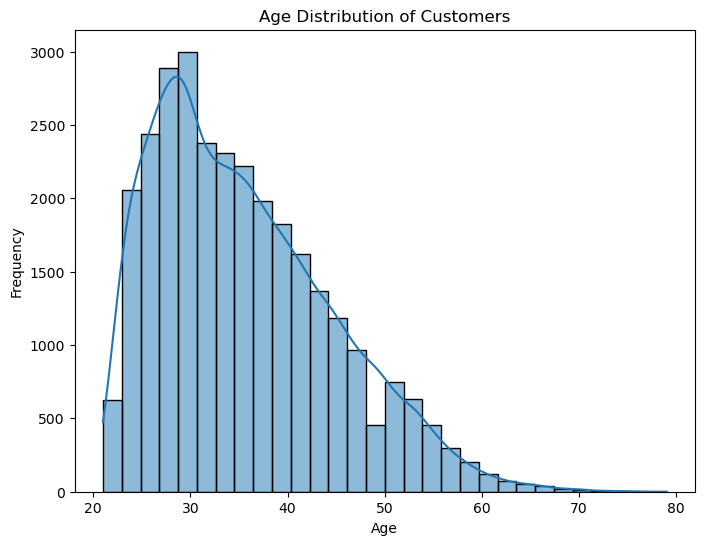

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Marital Status Distribution (MARRIAGE)

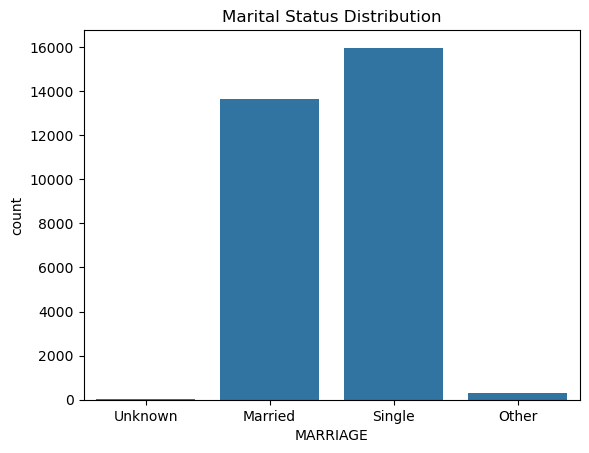

In [29]:
sns.countplot(x='MARRIAGE', data=df)
plt.title('Marital Status Distribution')
plt.xticks([0, 1, 2, 3], ['Unknown', 'Married', 'Single', 'Other'])
plt.show()


## Education Level Distribution (EDUCATION)

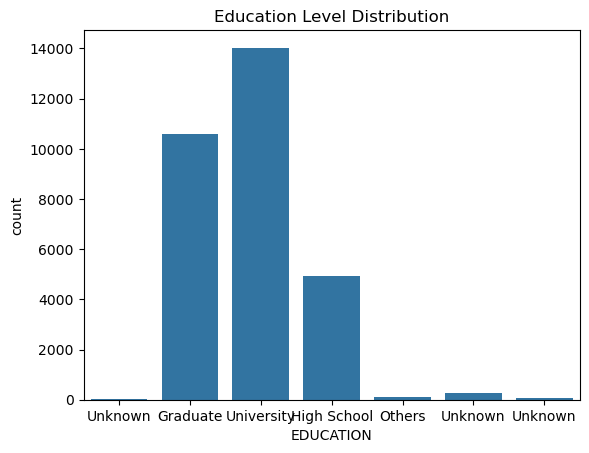

In [31]:
sns.countplot(x='EDUCATION', data=df)
plt.title('Education Level Distribution')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Unknown', 'Graduate', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])
plt.show()


## Default Rate by Gender

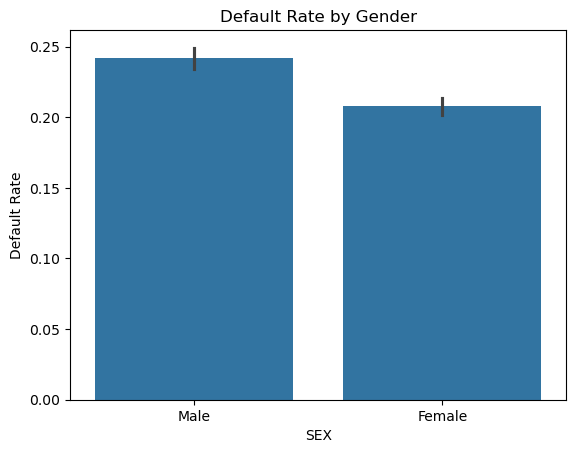

In [35]:
sns.barplot(x='SEX', y='default payment next month', data=df)
plt.title('Default Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Default Rate')
plt.show()


## Default Rate by Education

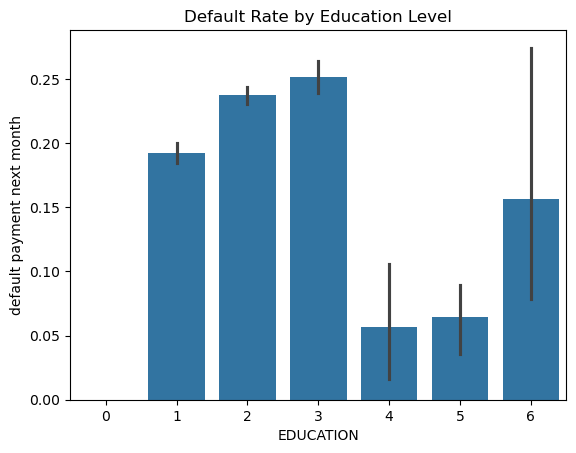

In [37]:
sns.barplot(x='EDUCATION', y='default payment next month', data=df)
plt.title('Default Rate by Education Level')
plt.show()


## correlation between numerical features in the dataset.

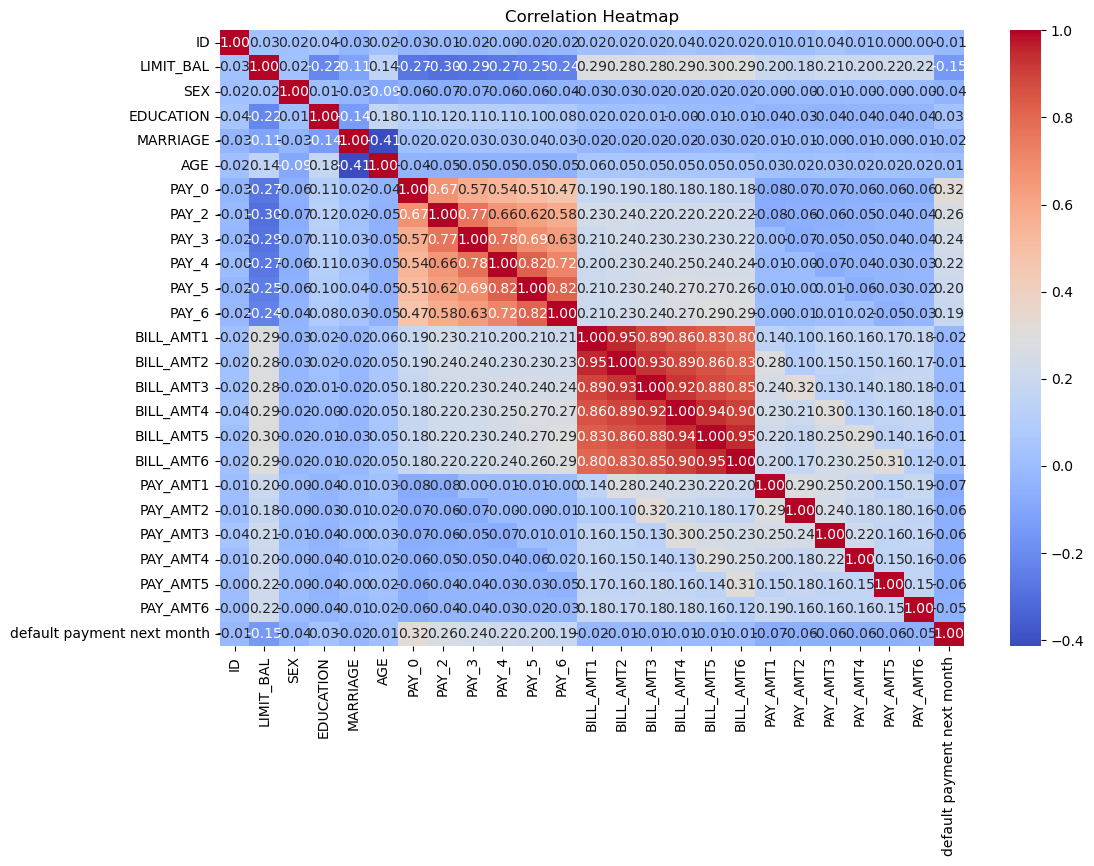

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Boxplot of Credit Limit by Default Status

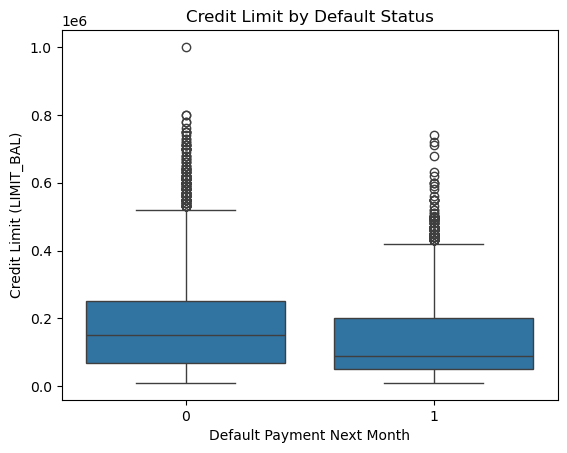

In [41]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Credit Limit by Default Status')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.show()


## Payment Status Heatmap

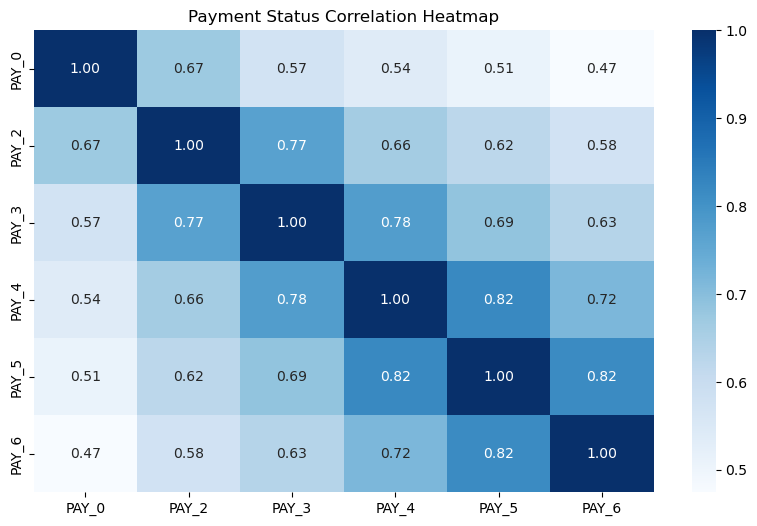

In [43]:
payment_status = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plt.figure(figsize=(10, 6))
sns.heatmap(payment_status.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Payment Status Correlation Heatmap')
plt.show()


## Scatterplot of Credit Limit vs. Bill Amounts

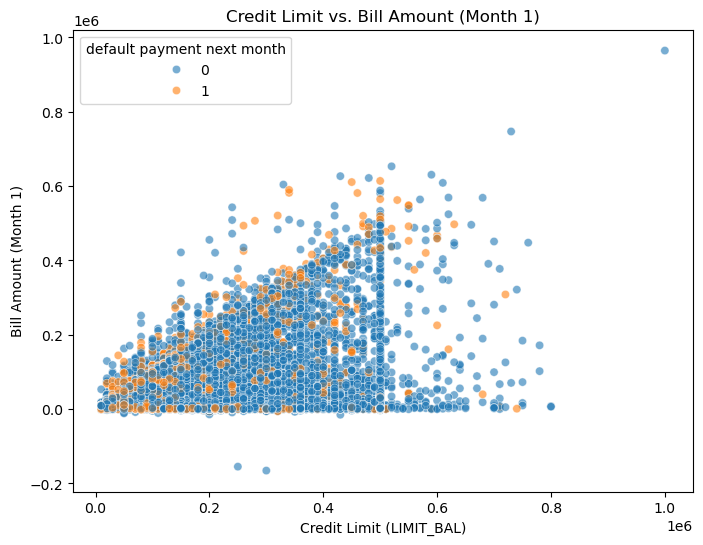

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LIMIT_BAL', y='BILL_AMT1', data=df, hue='default payment next month', alpha=0.6)
plt.title('Credit Limit vs. Bill Amount (Month 1)')
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Bill Amount (Month 1)')
plt.show()


## Scatterplot of Credit Limit vs. Payment Amounts

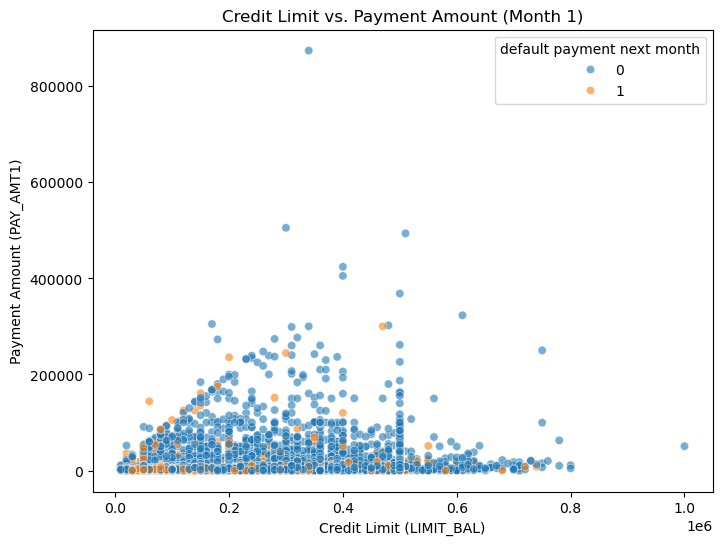

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LIMIT_BAL', y='PAY_AMT1', data=df, hue='default payment next month', alpha=0.6)
plt.title('Credit Limit vs. Payment Amount (Month 1)')
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Payment Amount (PAY_AMT1)')
plt.show()


## Scatterplot of Age vs. Credit Limit

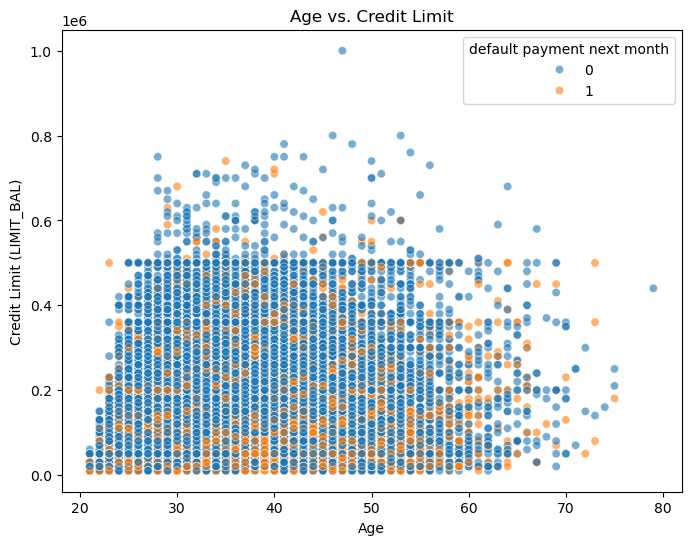

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='LIMIT_BAL', data=df, hue='default payment next month', alpha=0.6)
plt.title('Age vs. Credit Limit')
plt.xlabel('Age')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.show()


## Scatterplot of Age vs. Total Bill Amounts

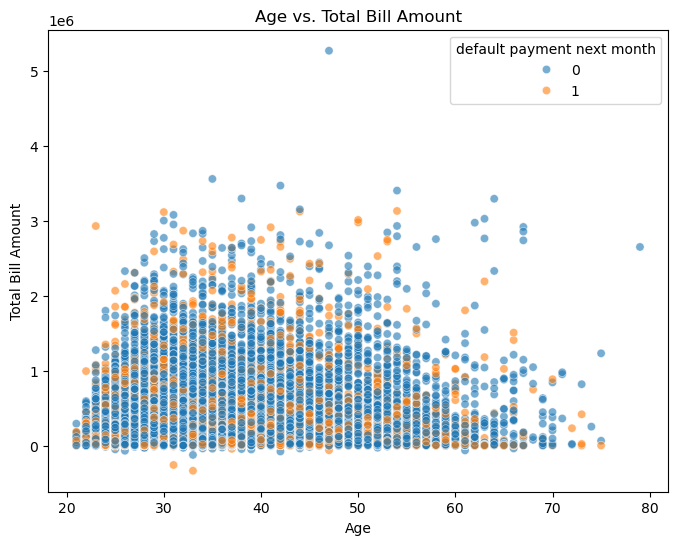

In [51]:
df['Total_Bill_Amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='Total_Bill_Amt', data=df, hue='default payment next month', alpha=0.6)
plt.title('Age vs. Total Bill Amount')
plt.xlabel('Age')
plt.ylabel('Total Bill Amount')
plt.show()


# Preprocessing

## Create new features that might be useful for prediction. The ratio of payment amounts to bill amounts, or total bills.

In [53]:
df['Total_Bill_Amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['Total_Pay_Amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
df['Payment_to_Bill_Ratio'] = df['Total_Pay_Amt'] / (df['Total_Bill_Amt'] + 1e-6)  # Avoid division by zero


In [57]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill_Amt,Total_Pay_Amt,Payment_to_Bill_Ratio
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,689,0.089434
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,17077,5000,0.292791
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,101653,11018,0.108388
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,231334,8388,0.036259
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,109339,59049,0.540054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,725349,42550,0.058661
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,1837,3526,8998,129,0,0,0,21182,14490,0.684071
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0,0,22000,4200,2000,3100,1,70496,31300,0.443997
29998,29999,80000,1,3,1,41,1,-1,0,0,...,85900,3409,1178,1926,52964,1804,1,266611,147181,0.552044


## Handle Outliers

## Keep only 95th percentile, outliers will be removed

In [60]:
numeric_features = df.select_dtypes(include=['number']).columns


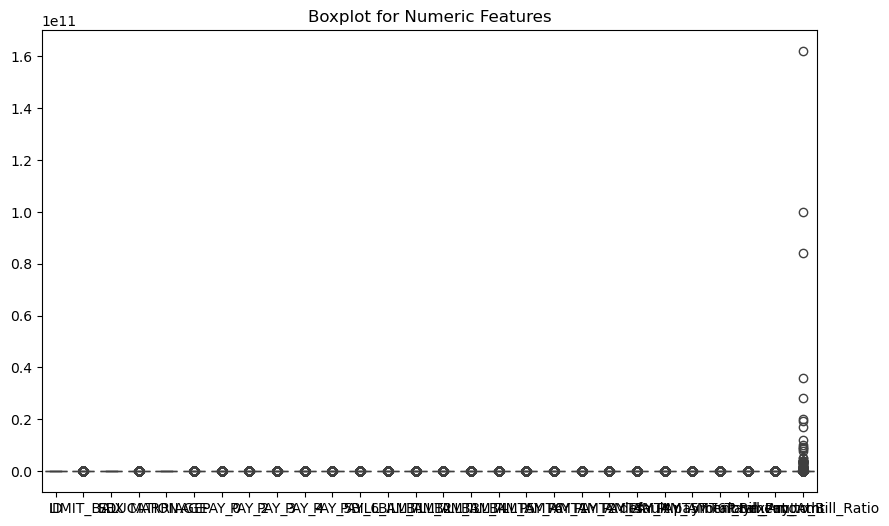

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_features])
plt.title('Boxplot for Numeric Features')
plt.show()

# Example of removing outliers
df = df[(df['LIMIT_BAL'] <= df['LIMIT_BAL'].quantile(0.95))]  # Keep only 95th percentile

In [64]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill_Amt,Total_Pay_Amt,Payment_to_Bill_Ratio
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,689,0.089434
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,17077,5000,0.292791
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,101653,11018,0.108388
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,231334,8388,0.036259
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,109339,59049,0.540054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,725349,42550,0.058661
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,1837,3526,8998,129,0,0,0,21182,14490,0.684071
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0,0,22000,4200,2000,3100,1,70496,31300,0.443997
29998,29999,80000,1,3,1,41,1,-1,0,0,...,85900,3409,1178,1926,52964,1804,1,266611,147181,0.552044


In [66]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 28525 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          28525 non-null  int64  
 1   LIMIT_BAL                   28525 non-null  int64  
 2   SEX                         28525 non-null  int64  
 3   EDUCATION                   28525 non-null  int64  
 4   MARRIAGE                    28525 non-null  int64  
 5   AGE                         28525 non-null  int64  
 6   PAY_0                       28525 non-null  int64  
 7   PAY_2                       28525 non-null  int64  
 8   PAY_3                       28525 non-null  int64  
 9   PAY_4                       28525 non-null  int64  
 10  PAY_5                       28525 non-null  int64  
 11  PAY_6                       28525 non-null  int64  
 12  BILL_AMT1                   28525 non-null  int64  
 13  BILL_AMT2                   28525 no

# Machine learning models for classification problem

In [80]:
X = df.drop(columns=['default payment next month', 'ID'])
y = df['default payment next month']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

Logistic Regression Performance:
[[4328  114]
 [ 951  312]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4442
           1       0.73      0.25      0.37      1263

    accuracy                           0.81      5705
   macro avg       0.78      0.61      0.63      5705
weighted avg       0.80      0.81      0.78      5705

Accuracy: 0.813321647677476


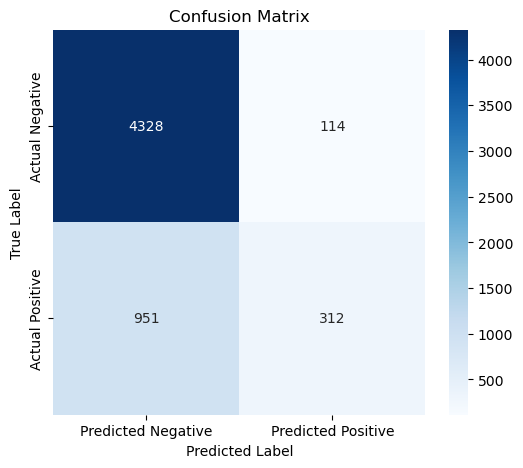

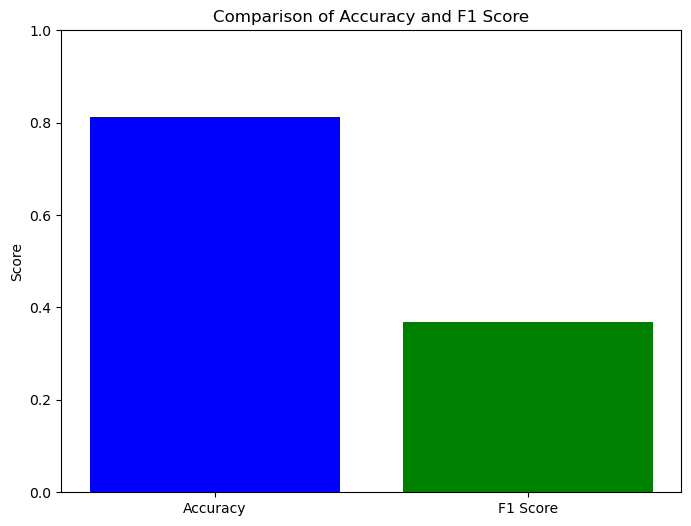

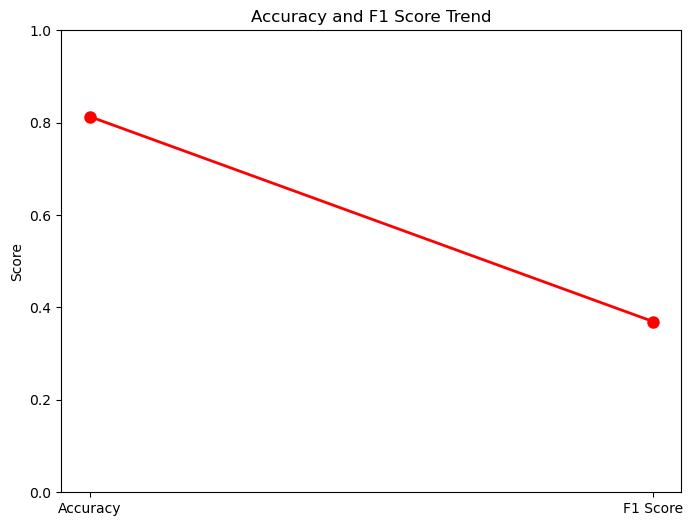

In [84]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)
print(classification_report(y_test, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

# Bar chart for Accuracy and F1-score comparison
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green'])
plt.title("Comparison of Accuracy and F1 Score")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

# Line plot for Accuracy and F1-score
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy and F1 Score Trend")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

## Random Forest Classifier

Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}
Improved Random Forest Classifier Performance:
[[4222  220]
 [ 811  452]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4442
           1       0.67      0.36      0.47      1263

    accuracy                           0.82      5705
   macro avg       0.76      0.65      0.68      5705
weighted avg       0.80      0.82      0.80      5705

Accuracy: 0.8192813321647677


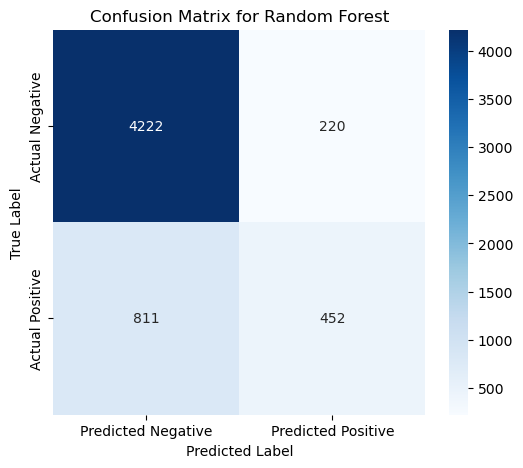

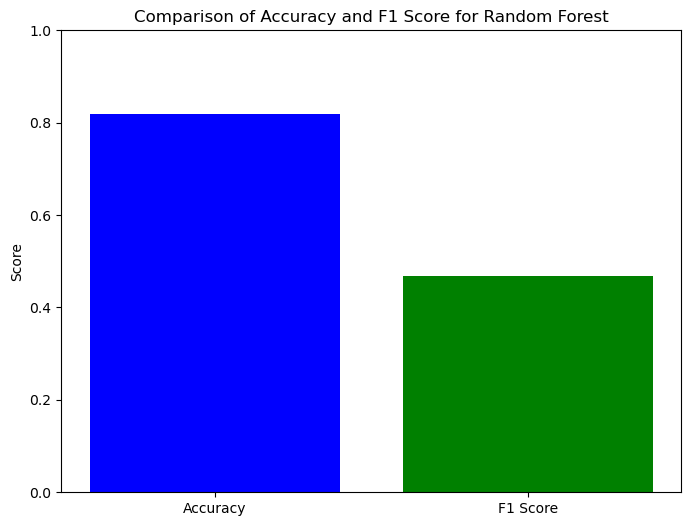

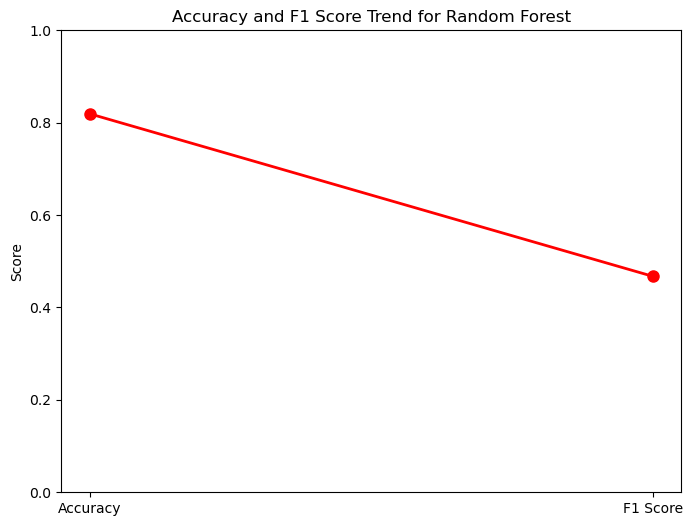

In [86]:
# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model to predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Improved Random Forest Classifier Performance:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar chart for Accuracy and F1-score comparison
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green'])
plt.title("Comparison of Accuracy and F1 Score for Random Forest")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

# Line plot for Accuracy and F1-score
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy and F1 Score Trend for Random Forest")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

## Feed Forward neural network

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7881 - loss: 0.5054 - val_accuracy: 0.8155 - val_loss: 0.4512
Epoch 2/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8147 - loss: 0.4494 - val_accuracy: 0.8153 - val_loss: 0.4446
Epoch 3/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8143 - loss: 0.4484 - val_accuracy: 0.8162 - val_loss: 0.4365
Epoch 4/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.8207 - loss: 0.4348 - val_accuracy: 0.8162 - val_loss: 0.4403
Epoch 5/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.8196 - loss: 0.4376 - val_accuracy: 0.8162 - val_loss: 0.4361
Epoch 6/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8179 - loss: 0.4336 - val_accuracy: 0.8170 - val_loss: 0.4373
Epoch 7/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8145 - loss: 0.4354 - val_accuracy: 0.8144 - val_loss: 0.4353
Epoch 8/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8162 - loss: 0.4355 - val_accurac

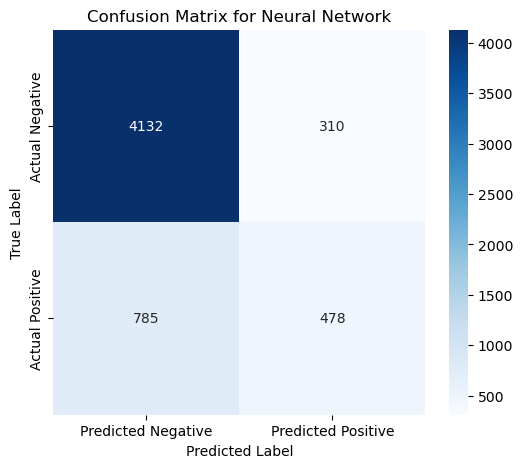

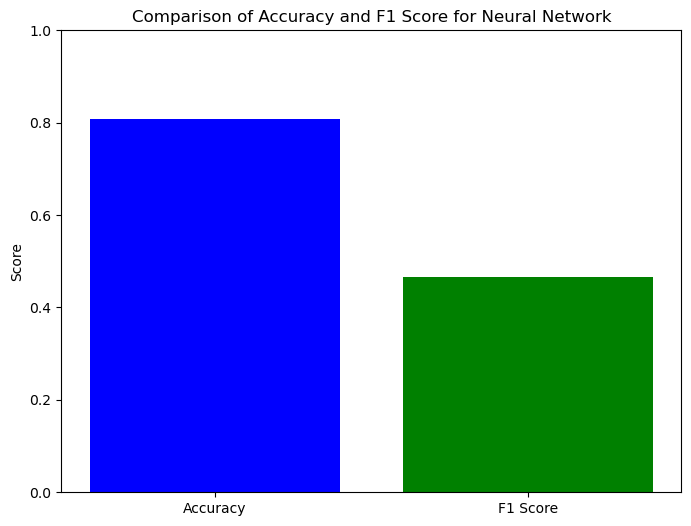

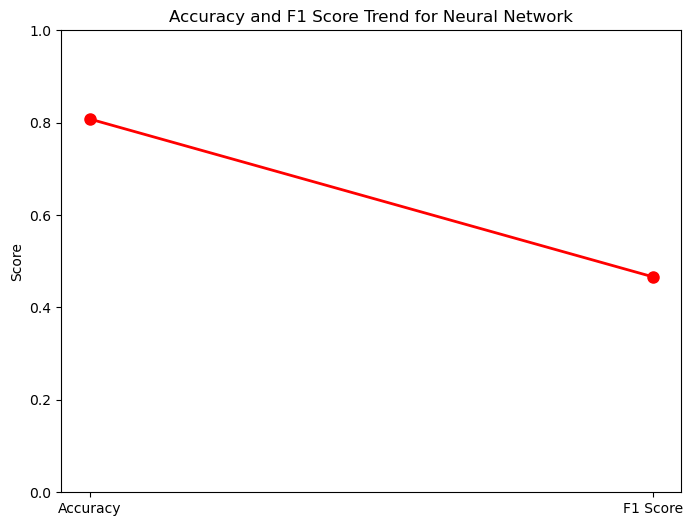

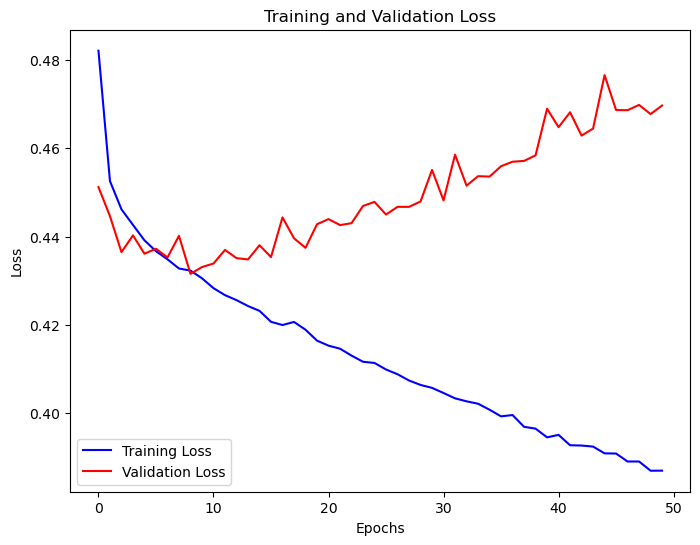

In [88]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),                                    # Hidden layer
    layers.Dense(1, activation='sigmoid')                                   # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold for classification

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report and metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar chart for Accuracy and F1-score comparison
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green'])
plt.title("Comparison of Accuracy and F1 Score for Neural Network")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

# Line plot for Accuracy and F1-score
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy and F1 Score Trend for Neural Network")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()